# Hackathon Challenge: Predicting Loan Default Risk.

Financial institutions face significant challenges in assessing the creditworthiness of loan applicants. Accurate evaluation of an applicant's ability to repay a loan is crucial for minimising defaults and managing risk. Traditional methods of credit assessment may not fully capture the complexities of individual financial behaviour, leading to potential losses for lenders. By leveraging machine learning and predictive analytics, institutions can enhance their loan approval processes and make more informed decisions.

## Challenge:
Develop a predictive model that accurately evaluates the risk of loan defaults based on applicant data. The model should assist financial institutions in making better lending decisions, ultimately reducing the risk of defaults and improving overall portfolio performance.

## Objectives:
    1). Data Exploration and Preprocessing:
Analyse the dataset to identify key features that influence loan default risk.
Perform necessary data cleaning and preprocessing to ensure the dataset is ready for modelling.
   
    2). Model Development:
Build and train a predictive model to evaluate the likelihood of loan defaults.
Explore and implement various machine learning algorithms such as Logistic Regression, Decision Trees, Random Forest, Gradient Boosting Machines, etc.

    3). Evaluation:
Assess the model's performance using relevant metrics such as accuracy, precision, recall, F1 score, ROC-AUC, and especially the precision-recall trade-off to balance risk and reward.
Ensure the model's predictions are fair and unbiased, particularly in sensitive areas like income and employment status.

	4). Actionable Insights:
Provide insights into the factors that most significantly impact loan default risk.
Offer recommendations on how financial institutions can integrate the model into their loan approval processes to enhance decision-making and risk management.

    5) . Documentation and Presentation:
Document your process, including data preprocessing, model selection, and evaluation criteria.
Prepare a presentation that clearly communicates the model’s performance, insights, and practical implications for financial institutions
.
## Submission Requirements:
A well-documented code repository with instructions for running your model.
A detailed report or presentation summarising your approach, results, and insights.
A demo or visualisation showcasing the model’s predictions and its potential impact on loan approval processes.

## Evaluation Criteria:
Accuracy and performance of the predictive model.
Quality and thoroughness of data preprocessing and feature engineering.
Fairness and lack of bias in predictions.
Clarity and usefulness of actionable insights provided.
Overall presentation and documentation.





## Dataset courtesy of kaggle https://www.kaggle.com/datasets/yasserh/loan-default-dataset

In [1]:
%pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer  # to be used for NaN imputation

from pycaret.classification import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

#Resampling
from imblearn.over_sampling import SMOTE

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



ModuleNotFoundError: No module named 'pandas'

### Import dataset

In [1]:
df = pd.read_csv('Loan_Default.csv')
df.head()

NameError: name 'pd' is not defined

In [4]:
df.tail()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0
148669,173559,2019,cf,Female,nopre,type1,p3,l1,nopc,nob/c,...,CIB,830,CIB,45-54,not_inst,72.849462,North,direct,0,44.0


In [5]:
#Check the ddata types,
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [42]:
# Check number of rows and columns in the data frame
df.shape

(148670, 34)

In [7]:
#Check the df data traits for numeric columns ((ignore ID and year columns))
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,148670.0,99224.500000,42917.476598,24890.000000,62057.25000,99224.50000,136391.750000,1.735590e+05
year,148670.0,2019.000000,0.000000,2019.000000,2019.00000,2019.00000,2019.000000,2.019000e+03
loan_amount,148670.0,331117.743997,183909.310127,16500.000000,196500.00000,296500.00000,436500.000000,3.576500e+06
rate_of_interest,112231.0,4.045476,0.561391,0.000000,3.62500,3.99000,4.375000,8.000000e+00
Interest_rate_spread,112031.0,0.441656,0.513043,-3.638000,0.07600,0.39040,0.775400,3.357000e+00
Upfront_charges,109028.0,3224.996127,3251.121510,0.000000,581.49000,2596.45000,4812.500000,6.000000e+04
term,148629.0,335.136582,58.409084,96.000000,360.00000,360.00000,360.000000,3.600000e+02
property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,1.650800e+07
income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,5.785800e+05
Credit_Score,148670.0,699.789103,115.875857,500.000000,599.00000,699.00000,800.000000,9.000000e+02


In [8]:
#Check the total missing values for each column
df.isna().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


# Step (II): Data Cleaning

    Handling Missing Values

### Check Information on the different columns (to identify categorical and numeric columns)

In [9]:
columns = df.columns


In [10]:
#This will help in identifying categorical columns that are in numeric form
for column in columns:
  print(f"\n\033[1m{column}\033[0m\n")  #  prints column name in bold
  print(df[column].unique()[:10]) # print the first 10


ID

[24890 24891 24892 24893 24894 24895 24896 24897 24898 24899]

year

[2019]

loan_limit

['cf' nan 'ncf']

Gender

['Sex Not Available' 'Male' 'Joint' 'Female']

approv_in_adv

['nopre' 'pre' nan]

loan_type

['type1' 'type2' 'type3']

loan_purpose

['p1' 'p4' 'p3' 'p2' nan]

Credit_Worthiness

['l1' 'l2']

open_credit

['nopc' 'opc']

business_or_commercial

['nob/c' 'b/c']

loan_amount

[116500 206500 406500 456500 696500 706500 346500 266500 376500 436500]

rate_of_interest

[  nan 4.56  4.25  4.    3.99  4.5   4.125 4.875 3.49  4.375]

Interest_rate_spread

[    nan  0.2     0.681   0.3042  0.1523  0.9998  0.2975  0.7395 -0.2776
  0.1871]

Upfront_charges

[    nan  595.      0.    370.   5120.   5609.88 1150.   2316.5  3953.13
  895.  ]

term

[360. 300. 180. 312. 144. 240. 348. 324. 120.  96.]

Neg_ammortization

['not_neg' 'neg_amm' nan]

interest_only

['not_int' 'int_only']

lump_sum_payment

['not_lpsm' 'lpsm']

property_value

[ 118000.      nan  508000.  658000.  75800

#### All columns are well presented in that no numeric column needs to be converted to categorical except for the 'status' column

####  Drop irrelevant columns (ID and year columns)

In [43]:
df = df.drop(columns=['ID', 'year'], axis = 1)

### Rename the columns

In [44]:
# for all columns in the df, remove any separator or space and replace with "_"
# All column names should also be in small letters
def col_rename(df):
    for column in df.columns:
      df.rename(columns={column: column.replace(" ", "_").replace("-", "_").lower()}, inplace=True)
    return df

df = col_rename(df)

In [45]:
df.columns

Index(['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'credit_worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'interest_rate_spread',
       'upfront_charges', 'term', 'neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'secured_by', 'total_units', 'income', 'credit_type',
       'credit_score', 'co_applicant_credit_type', 'age',
       'submission_of_application', 'ltv', 'region', 'security_type', 'status',
       'dtir1'],
      dtype='object')

In [14]:
df1 = df.copy()

#### Group columns as numeric and categorical

In [46]:
#categorical columns are all columns of object data type, and the status column which is numeric
def categorical_numeric_col(df):
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

    # Append the 'status' column to categorical columns
    if 'status' in df.columns:
        categorical_columns.append('status')
    # Get all columns in the DataFrame
    all_columns = df.columns
    # Identify numeric columns by excluding categorical columns
    numeric_columns = [col for col in all_columns if col not in categorical_columns]

    return categorical_columns, numeric_columns

# Call the function and store results
categorical_columns, numeric_columns = categorical_numeric_col(df)

In [47]:
# Check the categorical columns
categorical_columns

['loan_limit',
 'gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'credit_worthiness',
 'open_credit',
 'business_or_commercial',
 'neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'secured_by',
 'total_units',
 'credit_type',
 'co_applicant_credit_type',
 'age',
 'submission_of_application',
 'region',
 'security_type',
 'status']

In [17]:
# Check the numerical columns
numeric_columns

['loan_amount',
 'rate_of_interest',
 'interest_rate_spread',
 'upfront_charges',
 'term',
 'property_value',
 'income',
 'credit_score',
 'ltv',
 'dtir1']

### Handling the missing values

In [48]:
#Get the percentage of the missing values and present the values in descending manner
x =((df.isna().sum()*100/len(df)).round(2)).reset_index()
x.columns = ['Column_name', 'Percentage(NaN)']
x = x.sort_values(by='Percentage(NaN)', ascending=False)
x

,Column_name,Percentage(NaN)
11,upfront_charges,26.66
10,interest_rate_spread,24.64
9,rate_of_interest,24.51
31,dtir1,16.22
27,ltv,10.16
16,property_value,10.16
21,income,6.15
0,loan_limit,2.25
2,approv_in_adv,0.61
26,submission_of_application,0.13


#### Drop rows where percentage <5%

In [49]:
for column in x[x['Percentage(NaN)']<5]['Column_name']:
  df = df[df[column].notna()]

In [50]:
#Check the remaining columns with NaNs
x =((df.isna().sum()*100/len(df)).round(2)).reset_index()
x.columns = ['Column_name', 'Percentage(NaN)']
x = x.sort_values(by='Percentage(NaN)', ascending=False)
x


,Column_name,Percentage(NaN)
11,upfront_charges,26.61
9,rate_of_interest,24.49
10,interest_rate_spread,24.49
31,dtir1,16.19
27,ltv,10.14
16,property_value,10.14
21,income,6.14
6,open_credit,0.00
7,business_or_commercial,0.00
30,status,0.00


### Handling numerical columns

#### Use KNN imputation for columns where percentage is >5%

In [52]:
#Create a function to impute the missing numeric values
def apply_knn_imputation(df, percentage_nan_column, threshold=5, n_neighbors=5):
      """
      Applies KNN imputation to numeric columns where the percentage of NaN values exceeds the given threshold.

      Parameters:
      df (pd.DataFrame): The input DataFrame.
      percentage_nan_column (str): Column name that contains the percentage of NaN values for each column.
      threshold (int, optional): The percentage threshold to filter columns for imputation. Default is 5.
      n_neighbors (int, optional): Number of neighbors to use for KNN imputation. Default is 5.

      Returns:
      pd.DataFrame: The DataFrame with imputed values for relevant columns.
      """
      # Initialize KNN imputer
      imputer = KNNImputer(n_neighbors=n_neighbors)

      # Filter columns where Percentage(NaN) > threshold
      columns_to_impute = df[df[percentage_nan_column] > threshold]['Column_name']

      # Apply KNN imputation to each numeric column that needs imputation
      for column in columns_to_impute:
          if df[column].dtype in ['float64', 'int64']:  # Check if the column is numeric
              df[[column]] = imputer.fit_transform(df[[column]])

      return df

#Apply the function
df = apply_knn_imputation(df, 'Percentage(NaN)', threshold=5)


In [53]:
df.isna().sum()

,0
loan_limit,0
gender,0
approv_in_adv,0
loan_type,0
loan_purpose,0
credit_worthiness,0
open_credit,0
business_or_commercial,0
loan_amount,0
rate_of_interest,0


**Handling Categorical Variables**

In [23]:
# Check for NAs in he categorical columns
df[categorical_columns].isna().sum()
# At this point no categorical column has NAs

,0
loan_limit,0
gender,0
approv_in_adv,0
loan_type,0
loan_purpose,0
credit_worthiness,0
open_credit,0
business_or_commercial,0
neg_ammortization,0
interest_only,0


## Step (III): EDA

In [24]:
len(df.columns)

32

#### Categorical columns vs Status

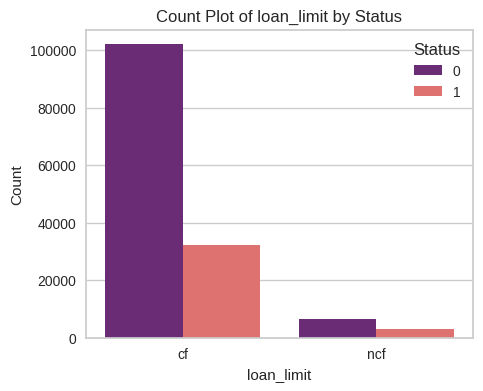

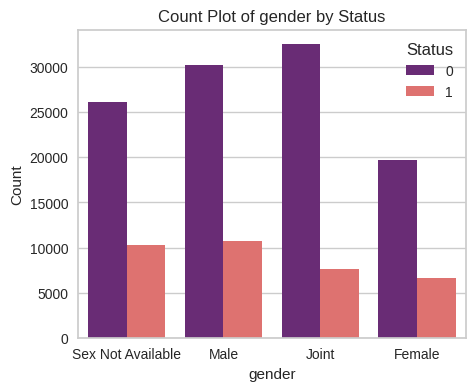

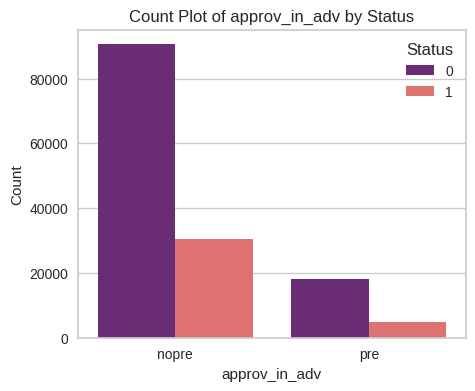

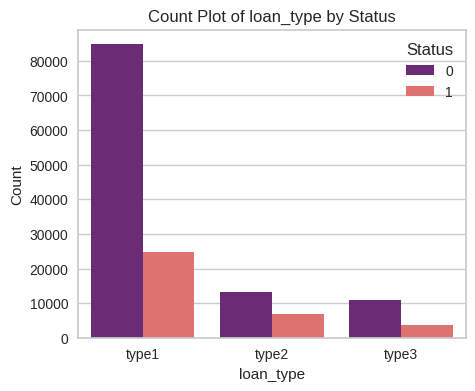

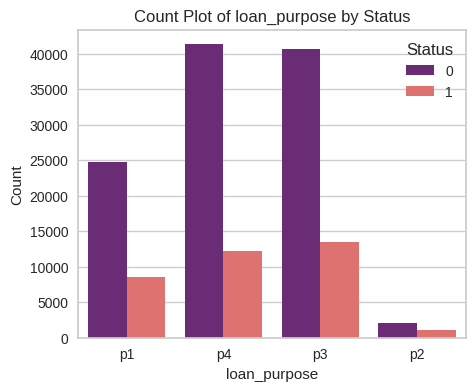

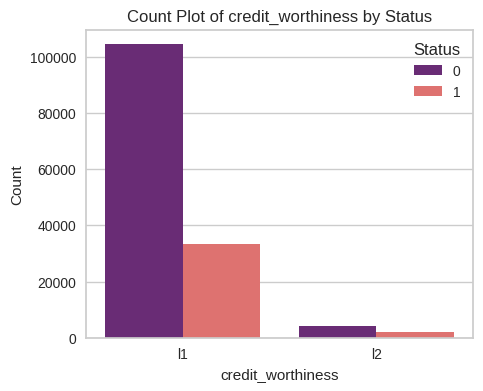

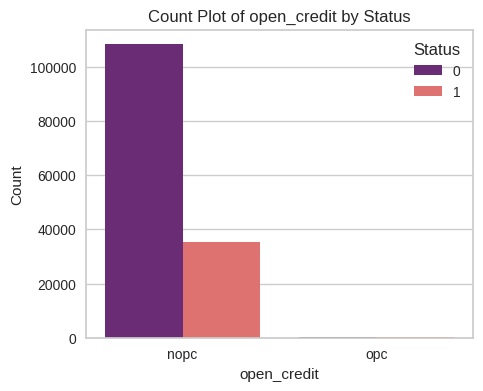

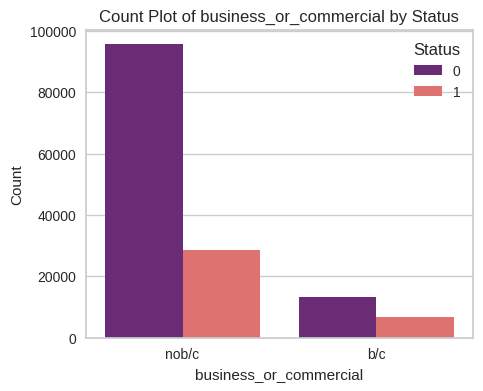

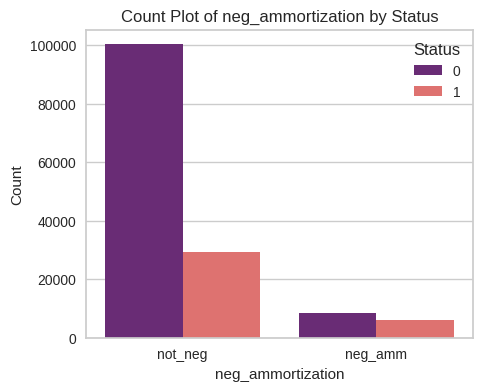

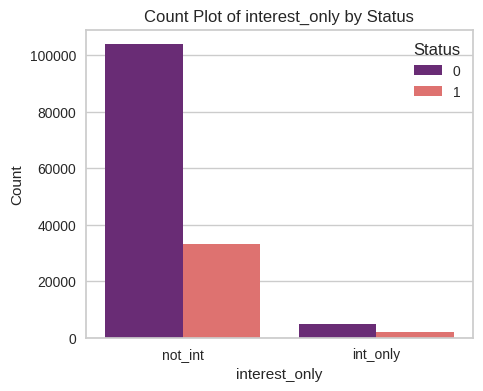

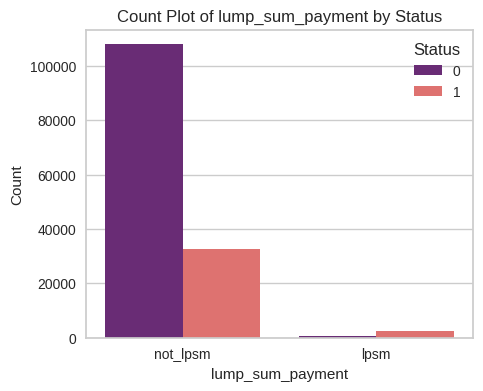

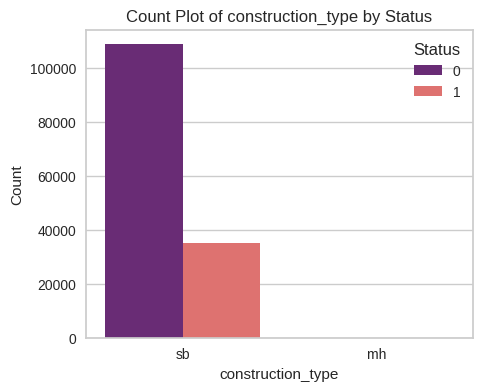

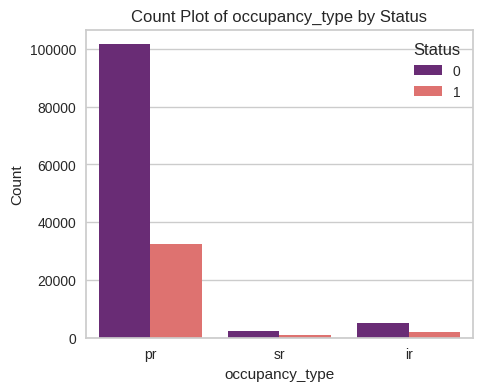

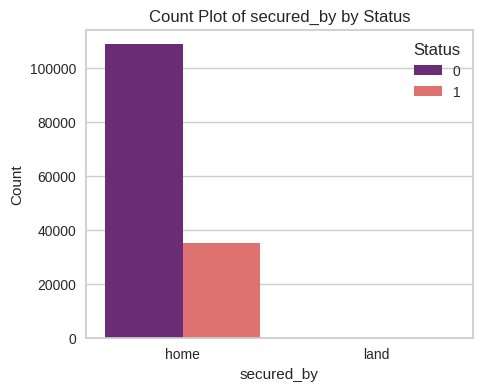

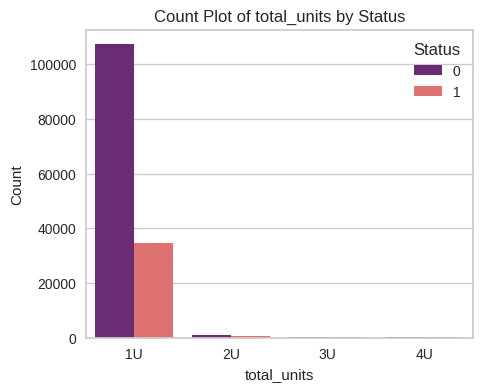

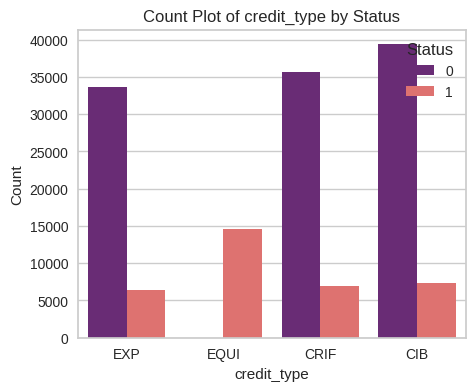

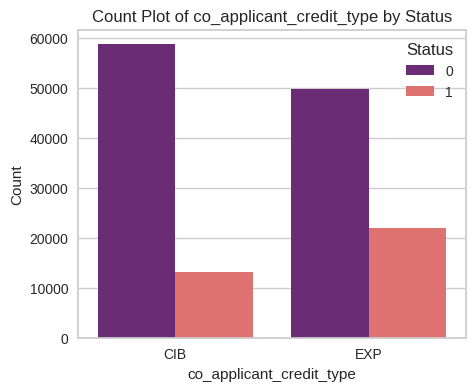

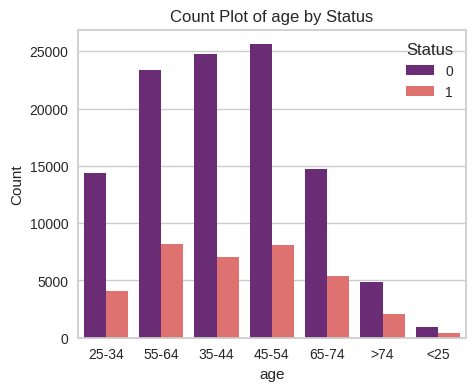

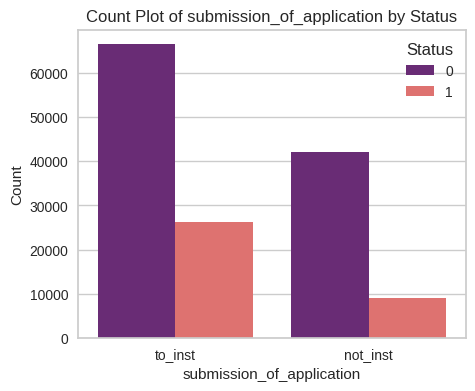

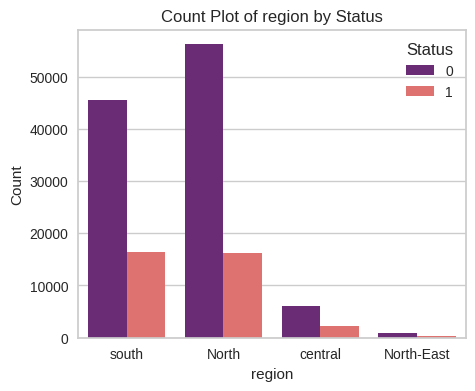

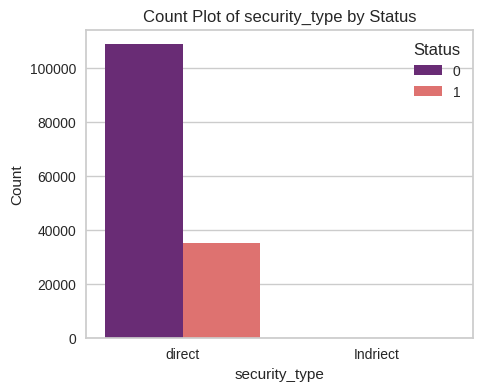

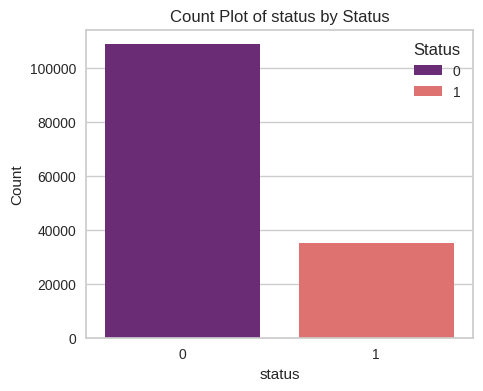

In [25]:
#Create count plots
def categorical_vs_status(df, categorical_columns):
    for col in categorical_columns:
        plt.figure(figsize=(5, 4))
        ax = sns.countplot(x=col, hue='status', data=df, palette='magma')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.title(f'Count Plot of {col} by Status')
        plt.legend(title='Status', loc='upper right')

        plt.show()

categorical_vs_status(df, categorical_columns)

### Comprehensive Report on Loan Default Analysis (Categorical columns)

    Credit Type:

Analysis of the credit_type column reveals that customers in the 'Equi' category tend to have a higher approval rate, with most of them receiving a status of 1 (approved). In contrast, the 'CIB' category shows the highest level of loan defaults among all credit types, indicating a potential risk group for the lender. Enhanced due diligence or revised lending criteria could be considered for customers in the 'CIB' category to mitigate default risk.

    Loan Limit:

A significant proportion of loans fall under the 'cf' (confirmed) type of loan limit, demonstrating a preference or need for this loan category. However, the rate of default is lower in 'ncf' (not confirmed) loans compared to 'cf' loans. This suggests that customers who receive 'ncf' loans might be more creditworthy or cautious. The lender might explore increasing the issuance of 'ncf' loans or adjusting terms for 'cf' loans to reduce default rates.

    Gender:

Analysis by gender reveals that female customers have the lowest default rates, followed by those who do not disclose their gender. Joint borrowers and male customers have the highest loan default rates. This insight indicates a potentially lower risk profile for female borrowers, which could lead to targeted lending campaigns or tailored loan products to attract more female customers, thereby reducing overall default rates.

    Approved in Advance (app_in_adv):

The data indicates that customers in the 'pre' category (loans approved in advance) have a lower rate of default compared to the 'nopre' category. This suggests that pre-approval processes may effectively filter out higher-risk applicants. Expanding pre-approval procedures could help improve loan performance and reduce default rates.

    Lump Sum Payment:

Customers opting for the 'lpsm' (lump sum payment) method are almost certain to repay their loans compared to those selecting 'not_lpsm'. This finding suggests that offering or encouraging lump sum payments could significantly reduce default risk. The lender might consider incentivizing lump sum payment options or offering discounts for customers who choose this payment method.

    Age:

Most customers are concentrated in the 35-44, 45-54, and 55-64 age groups. These groups also have the highest default rates, particularly the 45-54 age group, which leads in loan defaults. Conversely, the '<25' age group has the least number of customers and a notably low default rate. These findings suggest that the lender may benefit from targeting younger demographics who demonstrate lower default risks, while also reassessing the lending terms for middle-aged customers.

    Region:

The North region has the highest number of customers and also the highest rate of default. Conversely, the Central and North-East regions have the fewest customers and the lowest default rates. The company should consider developing targeted marketing strategies to attract more customers from these low-default regions to improve its risk profile and expand its market share in areas with favourable repayment behaviour.

    Status:

The data indicates that a large percentage of customers are defaulting on their loans. This high default rate could pose significant financial risk to the lender. Strategic actions, such as refining credit assessment processes, targeting lower-risk demographics, and enhancing risk management protocols, are recommended to mitigate this issue.

### Numerical columns

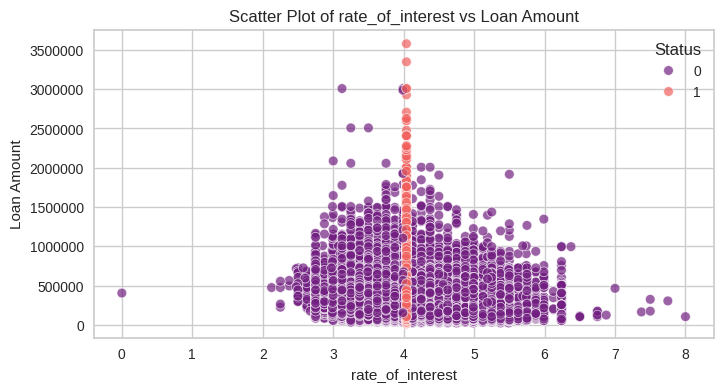

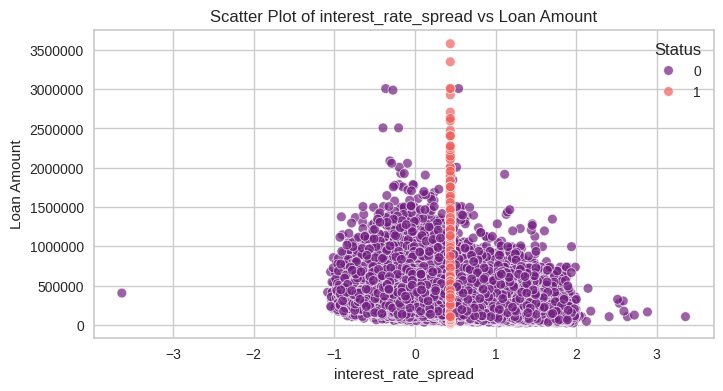

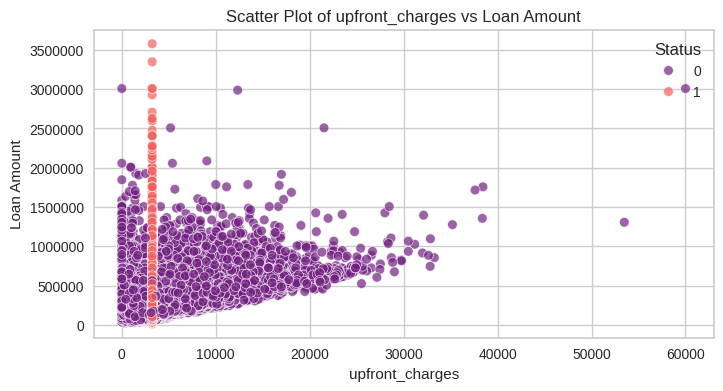

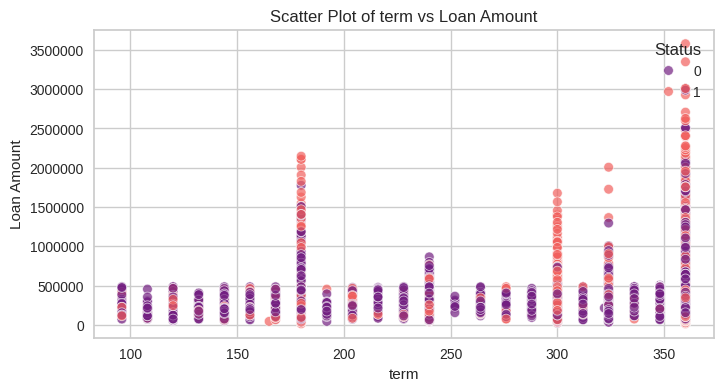

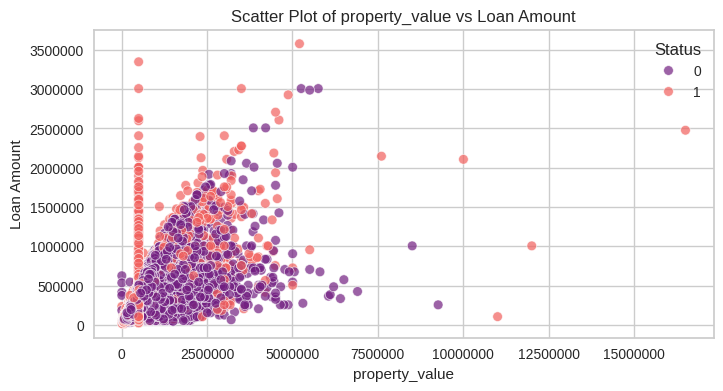

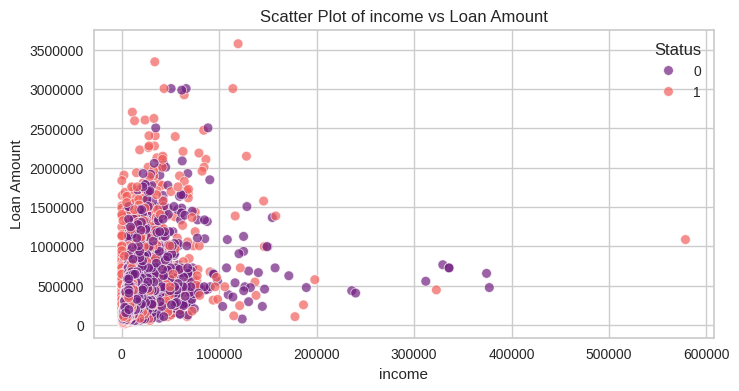

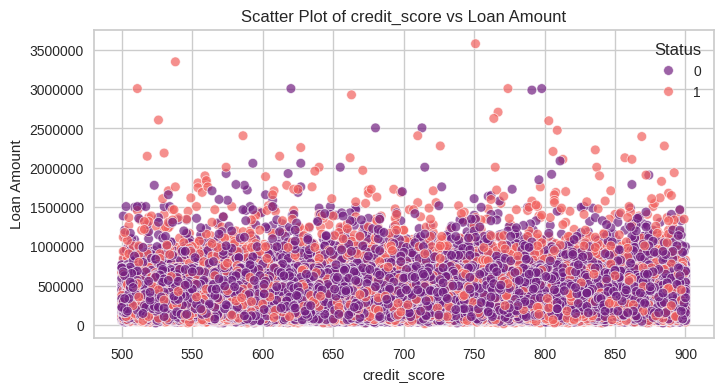

In [26]:
# Scatter plots to see the distribution of numerical columns and the status as the legend
def numeric_vs_status(df):
    y_col = 'loan_amount'
    x_cols = ['rate_of_interest', 'interest_rate_spread', 'upfront_charges',
              'term', 'property_value', 'income', 'credit_score']

    for col in x_cols:
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=col, y=y_col, data=df, hue='status', palette='magma', alpha=0.7)
        # Disable scientific notation
        plt.ticklabel_format(style='plain', axis='both')

        plt.legend(title='Status', loc='upper right')
        plt.xlabel(col)
        plt.ylabel('Loan Amount')
        plt.title(f'Scatter Plot of {col} vs Loan Amount')
        plt.show()

# Apply the function
numeric_vs_status(df)

#### Comprehensive Report on Key Insights from Scatter Plots:
    Rate of Interest:

When the rate of interest is at 4%, the rate of default is minimal. This suggests that customers are more likely to repay their loans when offered a lower interest rate. Financial institutions may consider maintaining or promoting lower interest rates around this threshold to minimize defaults.

    Interest Rate Spread:

A spread of 0.5% seems to correlate with a high likelihood of repayment. This implies that keeping the spread narrow — especially around 0.5% — might encourage customers to fulfill their loan obligations. Lower spreads likely make loans more affordable and reduce the burden on borrowers, contributing to improved repayment rates.

    Upfront Charges:

When upfront charges are around 4,000 (presumably in the relevant currency), customers exhibit a greater likelihood of repaying their loans. It may be beneficial to maintain or standardize these charges around this figure, as it appears to be a manageable upfront cost for many borrowers, enhancing the probability of loan repayment.

    Term Length:

Loans with terms of 180, 300, and 360 months (15, 25, and 30 years, respectively) show a higher likelihood of repayment. This indicates that customers are more comfortable with these specific loan terms, potentially because they offer flexibility and align with common long-term financial planning. Loan products with these terms could be promoted to improve repayment rates.

    Property Value:

Customers tend to repay loans when the property value is around 500,000 (currency units). In contrast, when property values exceed 2,500,000, and the loan amount is more than 1,500,000, the probability of repayment remains high. This trend suggests that higher-value properties still secure the loans well, perhaps due to their investment stability or the borrowers' stronger financial standing. Marketing strategies targeting high-value properties could thus prove beneficial.

### Check for Outliers

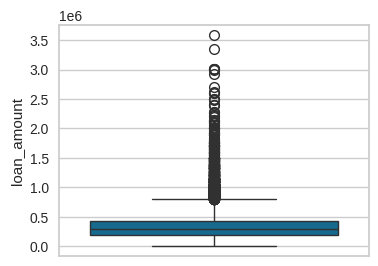

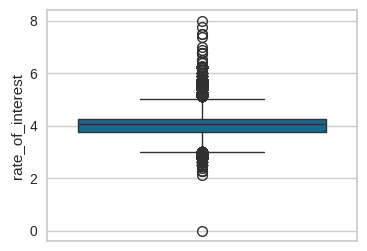

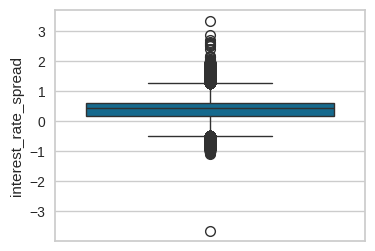

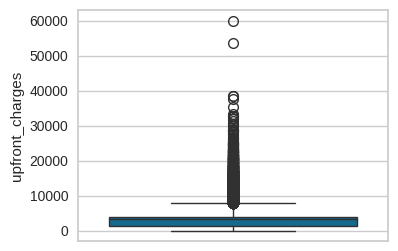

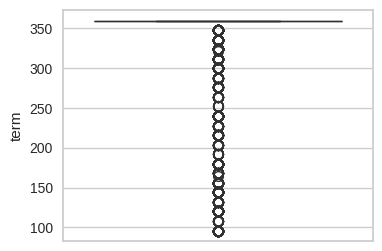

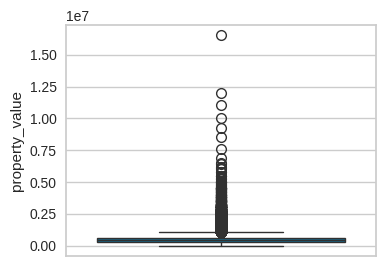

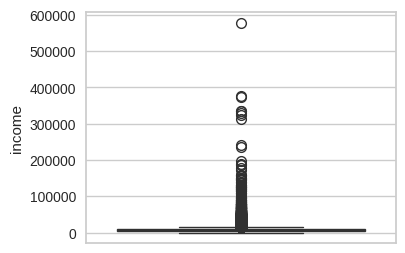

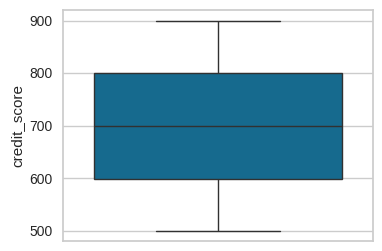

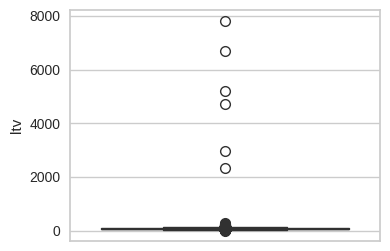

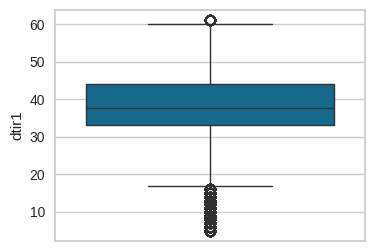

In [27]:
def outliers(df):
  for column in df[numeric_columns]:
    plt.figure(figsize=(4,3))
    sns.boxplot(df[column])
    plt.show()

outliers(df)

#### Correlation

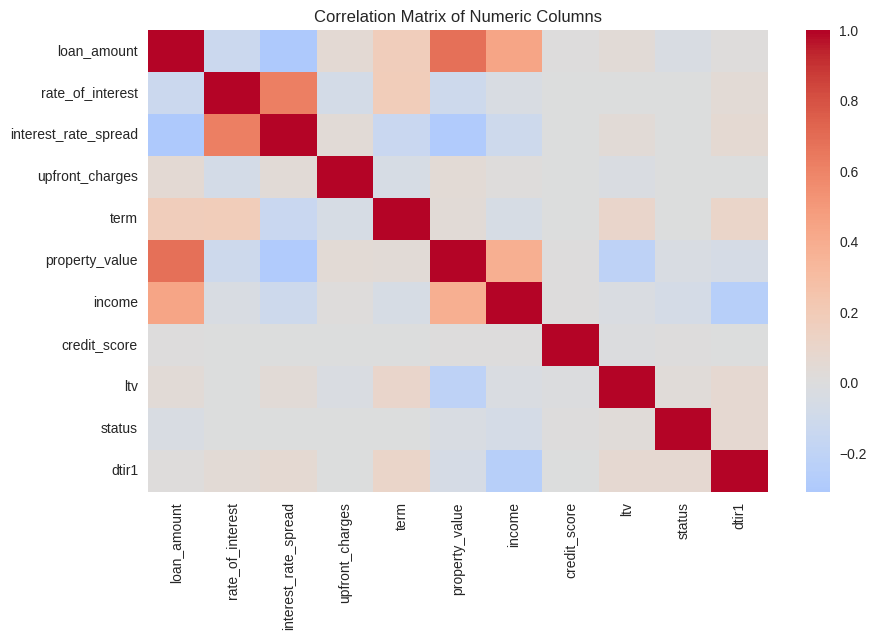

In [28]:
# Create correlation heat map
def correlations_df(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    numeric_df = df[numeric_columns]

    # Plot heatmap for the correlation matrix
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Numeric Columns')
    plt.show()

correlations_df(df)

#### Positive Correlations:

    Loan Amount vs Property Value:

Higher property values tend to correspond with higher loan amounts, suggesting that more valuable properties are associated with larger loans.

    Loan Amount vs Income:

Higher income levels are positively correlated with larger loan amounts, indicating that individuals with higher incomes are more likely to qualify for or take out larger loans.

    Interest Rate Spread vs Rate of Interest:

As the base rate of interest increases, the spread over the base rate also tends to increase, which might indicate a pricing structure based on risk or creditworthiness.

    Income vs Property Value:

Higher incomes are correlated with higher property values, possibly reflecting that individuals with higher incomes tend to own more valuable properties.

Negative Correlations:

    Interest Rate Spread vs Loan Amount:

As the loan amount increases, the interest rate spread tends to decrease. This might suggest that larger loans are offered at more competitive rates, possibly due to lower perceived risk or a stronger borrower profile.

    Income vs DTIR1:

Higher income is associated with a lower debt-to-income ratio, indicating that as income increases, the relative burden of debt payments decreases.

    Status
The status column, which likely indicates loan approval or default, shows no strong positive or negative correlations with any of the numeric columns. This suggests that loan approval or default may not be directly driven by any single numeric factor, or that the factors influencing status are more complex, possibly involving combinations of several variables or other non-numeric variables.


The lack of strong correlation with status implies that decisions related to loan status (approval or default) involve more intricate criteria, including categorical variables.

In [55]:
df.head()

,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,credit_score,co_applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,4.039763,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.000000
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,4.039763,...,EQUI,552,EXP,55-64,to_inst,72.694362,North,direct,1,37.720857
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560000,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.000000
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250000,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.000000
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000000,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.000000


**Step (IV): Model Building**

#### Encode the categorical variables

In [57]:
def apply_label_encoding(df):
    # Initialize Label Encoder
    label_encoder = LabelEncoder()
    # Loop through each column in the DataFrame
    for col in df.select_dtypes(include=['object']).columns:
        # Apply Label Encoder to each categorical column
        df[col] = label_encoder.fit_transform(df[col].astype(str))

    return df


df = apply_label_encoding(df)

#### Split the data into the dependent(y) and target independent variables (X)

In [59]:
# Separate input features (X) and target variable (y)
X = df.drop(columns='status')
y = df['status']

# Split the 2 into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"The x shape is:, {X.shape}")
print(f"\n The y shape is:, {y.shape}")
print(f"\n The x_train shape is:, {X_train.shape}")
print(f"\n The x_test shape is:, {X_test.shape}")
print(f"\n The y_train shape is:, {y_train.shape}")
print(f"\n The y_test shape is:, {y_test.shape}")

The x shape is:, (143942, 31)

 The y shape is:, (143942,)

 The x_train shape is:, (115153, 31)

 The x_test shape is:, (28789, 31)

 The y_train shape is:, (115153,)

 The y_test shape is:, (28789,)


In [63]:
y_train.head()

,status
13472,0
145716,1
55031,0
18021,0
136789,0


### Resampling

Since there is an imbalance in the target variable i.e there is an imbalance in the status values (0 and 1), I use Synthetic Minority Over-sampling Technique (SMOTE) to generates synthetic samples based on the feature space similarities between existing minority instances.

In [65]:
def apply_smote(X_train, y_train):
      """
      Applies SMOTE to balance the dataset based on the target column.

      Parameters:
      df (pd.DataFrame): The input DataFrame containing features and the target column.
      target_column (str): The name of the target column to balance.

      Returns:
      X_train_resampled (pd.DataFrame): The resampled input features.
      y_train_resampled (pd.Series): The resampled target variable.
      """


      # Apply SMOTE to balance the dataset
      smote = SMOTE(random_state=42)
      X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

      # Convert resampled arrays back to DataFrame and Series
      X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
      y_train_resampled = pd.Series(y_train_resampled, name='status')

      return X_train_resampled, y_train_resampled


X_train_resampled, y_train_resampled = apply_smote(X_train, y_train)

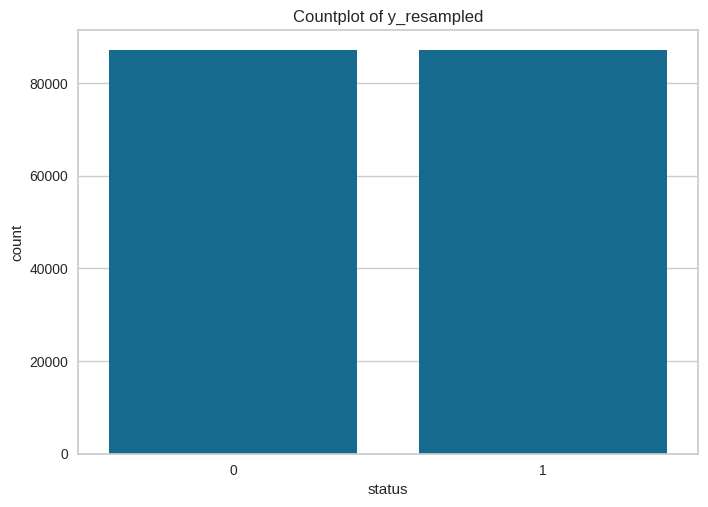

In [66]:
# Create a countplot to show the y_sampled values
sns.countplot(x=y_train_resampled)
plt.title('Countplot of y_resampled')
plt.show()


In [67]:
# Rename the sampled data back to X and y train
X_train = X_train_resampled
y_train = y_train_resampled

In [68]:
print(f"The x shape is:, {X.shape}")
print(f"\n The y shape is:, {y.shape}")
print(f"\n The x_train shape is:, {X_train.shape}")
print(f"\n The x_test shape is:, {X_test.shape}")
print(f"\n The y_train shape is:, {y_train.shape}")
print(f"\n The y_test shape is:, {y_test.shape}")


The x shape is:, (143942, 31)

 The y shape is:, (143942,)

 The x_train shape is:, (174180, 31)

 The x_test shape is:, (28789, 31)

 The y_train shape is:, (174180,)

 The y_test shape is:, (28789,)


#### using pycaret to choose the best performing models

In [ ]:
setup(data=pd.concat([X_train, y_train], axis=1), target='Status')

,Description,Value
0,Session id,7215
1,Target,Status
2,Target type,Binary
3,Original data shape,"(115153, 32)"
4,Transformed data shape,"(115153, 32)"
5,Transformed train set shape,"(80607, 32)"
6,Transformed test set shape,"(34546, 32)"
7,Numeric features,31
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4480
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,5.0420
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4700
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,4.6580
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,11.5250
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.3900
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,6.4550
et,Extra Trees Classifier,0.9988,1.0000,0.9964,0.9987,0.9975,0.9967,0.9967,9.0810
nb,Naive Bayes,0.9728,0.9904,0.9977,0.9013,0.9470,0.9288,0.9310,0.4130
knn,K Neighbors Classifier,0.8644,0.8826,0.6567,0.7549,0.7023,0.6151,0.6176,7.8380


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=7215, splitter='best')

### Function to make predictions based on 3 models, (Decision trees, Random Forest, and XGBoost)


In [85]:
#Function to make the predictions and output a classification report
def apply_classifiers(X_train, X_test, y_train, y_test):
      # Decision Tree Classifier
      dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, random_state=7215, splitter='best')

      #Random forest
      rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                  criterion='gini', max_depth=None, max_features='log2',
                                  min_impurity_decrease=0.0, min_samples_leaf=1,
                                  min_samples_split=2, n_estimators=100,
                                  random_state=7215, verbose=0)
      # XGBoost Classifier
      xgb_model = xgb.XGBClassifier(random_state=42)
      #Ada boost classifier
      ada_model = AdaBoostClassifier(random_state = 42)



      # Map model names to model objects
      models = {'Decision Tree': dt, 'Random Forest': rf, 'XGBoost': xgb_model, 'AdaBoost': ada_model}

      trained_models = {}

      for model_name, model in models.items():
          # Train the model
          model.fit(X_train, y_train)
          trained_models[model_name] = model
          # Make predictions
          y_pred = model.predict(X_test)

          # Print classification report
          print(f"\n Classification Report for {model_name}: \n")
          print(classification_report(y_test, y_pred))



      return trained_models

trained_models = apply_classifiers(X_train, X_test, y_train, y_test)
trained_models



 Classification Report for Decision Tree: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21597
           1       1.00      1.00      1.00      7192

    accuracy                           1.00     28789
   macro avg       1.00      1.00      1.00     28789
weighted avg       1.00      1.00      1.00     28789


 Classification Report for Random Forest: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21597
           1       1.00      1.00      1.00      7192

    accuracy                           1.00     28789
   macro avg       1.00      1.00      1.00     28789
weighted avg       1.00      1.00      1.00     28789


 Classification Report for XGBoost: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21597
           1       1.00      1.00      1.00      7192

    accuracy                           1.00     28789

{'Decision Tree': DecisionTreeClassifier(random_state=7215),
 'Random Forest': RandomForestClassifier(max_features='log2', random_state=7215),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=42, ...),
 'AdaBoost': AdaBoostClassifier(random_state=42)}

#### All four models—Decision Tree, Random Forest, XGBoost, and AdaBoost—show exceptional performance with perfect classification metrics. They all achieve a classification accuracy of 1.00, with flawless precision, recall, and f1-scores for both classes. This suggests that the models are highly effective for this dataset, likely indicating an easy classification task.


#### Get feature importance

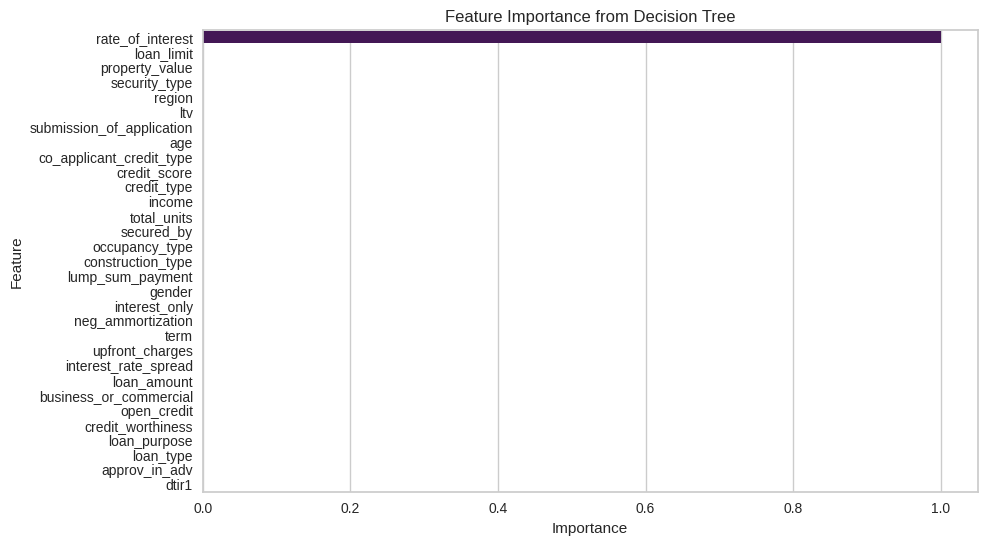

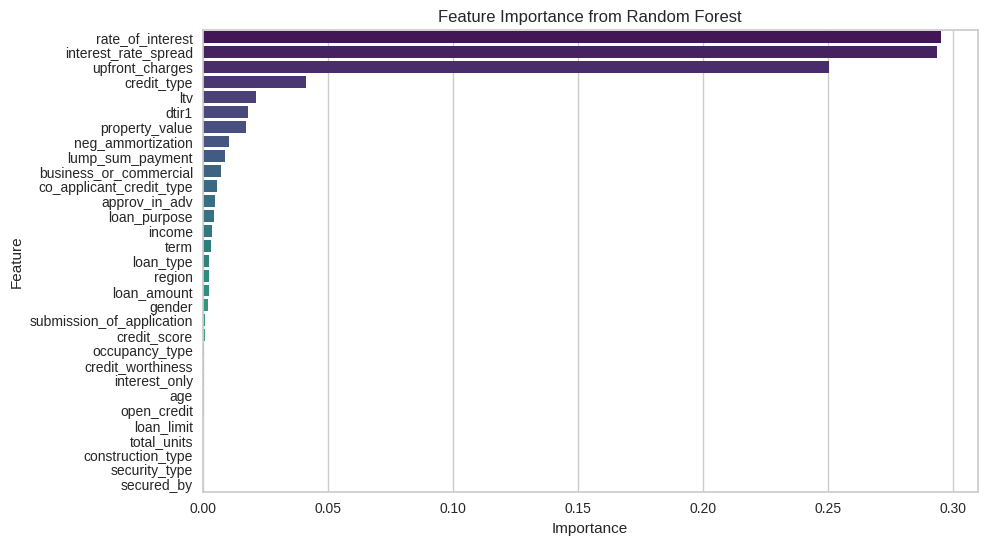

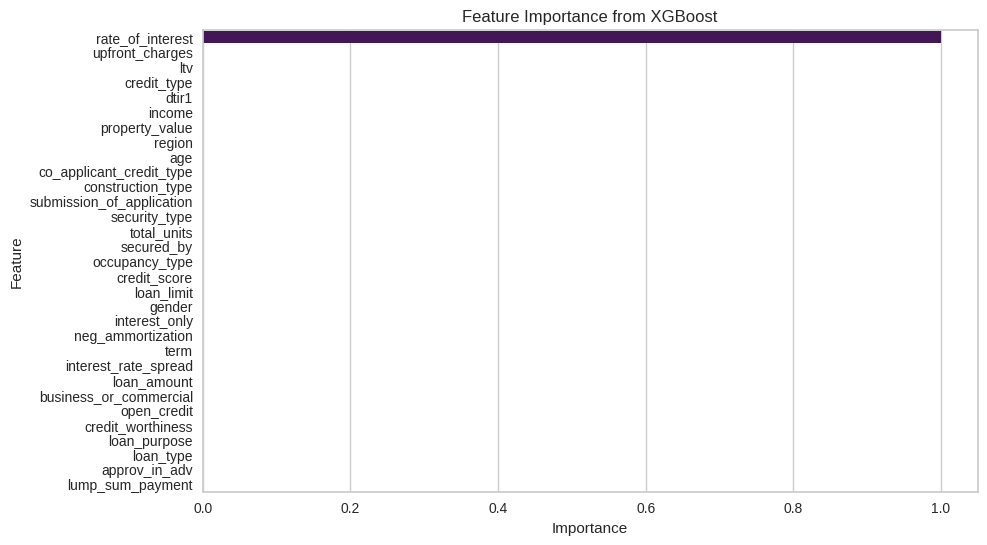

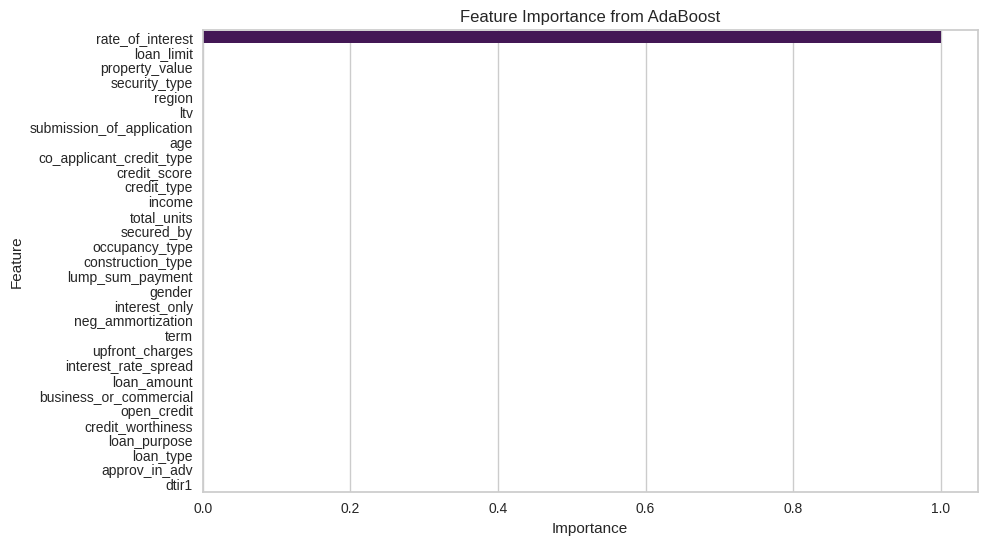

In [89]:
# Feature importance function

def plot_feature_importances(models, X):
    """
    Plots the feature importance of multiple trained models.

    Parameters:
    models (dict): Dictionary of model names and trained models.
    X (pd.DataFrame): The input features used to train the models.
    """
    for model_name, model in models.items():
        # Check if the model has the feature_importances_ attribute
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            features = X.columns

            # Create a DataFrame for plotting
            feature_importance_df = pd.DataFrame({
                'Feature': features,
                'Importance': importances
            }).sort_values(by='Importance', ascending=False)

            # Plot
            plt.figure(figsize=(10, 6))
            sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
            plt.title(f'Feature Importance from {model_name}')
            plt.xlabel('Importance')
            plt.ylabel('Feature')
            plt.show()
        else:
            print(f"{model_name} does not have the feature_importances_ attribute.")

# Apply the function
plot_feature_importances(trained_models, X_train)


### The best model is the random forest as it incorporates the most features

In [91]:
### Save the model
import joblib
joblib.dump(trained_models['Random Forest'], 'random_forest_model.pkl')

['random_forest_model.pkl']

## Actionable Insights:

**Insights into Factors Impacting Loan Default Risk**

The analysis of the dataset reveals several key factors that significantly influence loan default risk:

### Positively Correlated Variables

1. **Co-Applicant Credit Type (0.142)**: The correlation suggests that loans with co-applicants who have specific credit types (like 'CIB' or 'EXP') are more likely to default. This could imply that loans with certain co-applicant profiles might pose higher risks, potentially due to their credit history or other associated factors.

2. **Submission of Application (0.121)**: A positive correlation with loan defaults indicates that the method or timing of application submission ('to_inst' or 'not_inst') plays a role. Applications not submitted to institutions or submitted later may have higher default rates, possibly due to less stringent verification or urgency.

3. **Credit Type (0.112)**: The applicant's primary credit source (such as 'EXP', 'EQUI', etc.) also shows a positive association with loan defaults. This could reflect varying levels of risk associated with different credit bureaus or their reporting standards.

4. **DTI Ratio (0.063)**: The Debt-to-Income ratio, though weakly correlated, still impacts the default risk. Higher DTI ratios indicate a greater likelihood of default, as borrowers with higher debt obligations relative to their income may struggle to repay.

### Negatively Correlated Variables

1. **Income (-0.063)**: Higher income levels are negatively correlated with loan defaults, as borrowers with more substantial financial resources are generally more capable of repaying their loans.

2. **Business or Commercial Loans (-0.089)**: Loans categorized for business or commercial purposes are less likely to default, possibly due to the more stringent vetting processes or the presence of additional collateral.

3. **Negative Amortization (-0.134)**: Loans with negative amortization (where the payment is less than the interest, causing the loan balance to increase) show a negative correlation, suggesting these loans may be structured to mitigate default risks.

4. **Lump Sum Payment (-0.192)**: A strong negative correlation indicates that loans with lump sum payments have a lower risk of default. This might be because these payments often occur when borrowers have a sudden influx of capital, improving their repayment capacity.

To integrate the predictive model into loan approval processes, financial institutions can consider the following recommendations:

    1. Automated Pre-Screening System
The model can be used to automate the initial loan pre-screening stage. By inputting applicant data (e.g., credit type, submission method, income level, debt-to-income ratio) into the model, the system can quickly assess the default risk for each applicant. This will allow institutions to efficiently identify high-risk applications, prioritizing those with a lower risk profile for further manual review. This approach enhances decision-making speed and accuracy, while also freeing up resources to focus on complex cases.

    2. Dynamic Risk-Based Pricing
Financial institutions can employ the model to develop a dynamic risk-based pricing strategy. By evaluating an applicant's default risk, the model can help determine appropriate interest rates and loan terms that reflect the associated risk levels. Applicants with higher predicted default risks might be offered higher interest rates or shorter loan terms, while those with lower risks could benefit from more favourable terms. This strategy not only helps to balance risk and reward but also encourages responsible borrowing behaviour by aligning loan terms with risk profiles.

    3. Enhanced Risk Management Framework
Incorporate the model's predictions into the institution’s broader risk management framework. The model's outputs can be used alongside existing risk assessment tools to provide a more holistic view of potential default risks. This integration will allow institutions to adjust lending policies, set more precise credit limits, and make data-driven decisions about which loan products to promote or phase out. The model can also be used for ongoing monitoring, flagging loans that become riskier over time, allowing for timely intervention.

    4. Customized Credit Products
Leverage the model's insights to develop customized credit products tailored to different risk profiles. For example, high-risk applicants could be offered loans with built-in safeguards, such as collateral requirements or co-signers, while low-risk applicants could receive incentives like lower rates or faster approvals. Tailoring products in this way ensures that the institution maximizes market reach while maintaining a balanced risk portfolio.

    5. Continuous Model Improvement and Validation
The model should be regularly updated and validated with new data to ensure its accuracy and relevance over time. As market conditions, economic environments, and customer behaviours change, continuous model evaluation and recalibration are essential for maintaining robust risk predictions. Financial institutions should establish a feedback loop to incorporate outcomes from approved loans back into the model, refining it based on actual default occurrences.

By implementing these strategies, financial institutions can effectively integrate the predictive model into their loan approval processes, thereby enhancing decision-making, reducing default risks, and improving overall portfolio performance.